This demo uses synthetic data and visualizes the data and predictions, splits the data into training and testing sets, trains a linear regression model, makes predictions, and evaluates the model using simple metrics like MSE and R-squared. Each step is broken down and explained in easily understandable terms, with intermediate results printed to illustrate the process.

## Generate synthetic data

### Subtask:
Create a simple dataset with a clear relationship between input and output. Synthetic data is used here for demonstration purposes to clearly show how linear regression works on a dataset with a known underlying linear relationship.

In [15]:
import numpy as np

# Generate synthetic data
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(0, 1, size=len(X))

# Print the first 5 values to show the generated data
print("First 5 values of X:", X[:5])
print("First 5 values of y:", y[:5])

First 5 values of X: [0.        0.1010101 0.2020202 0.3030303 0.4040404]
First 5 values of y: [0.88945934 2.22219291 0.71199056 3.14243766 2.0944245 ]


## Visualize the data

### Subtask:
Plot the generated data to show the relationship visually and explain what we are trying to predict.


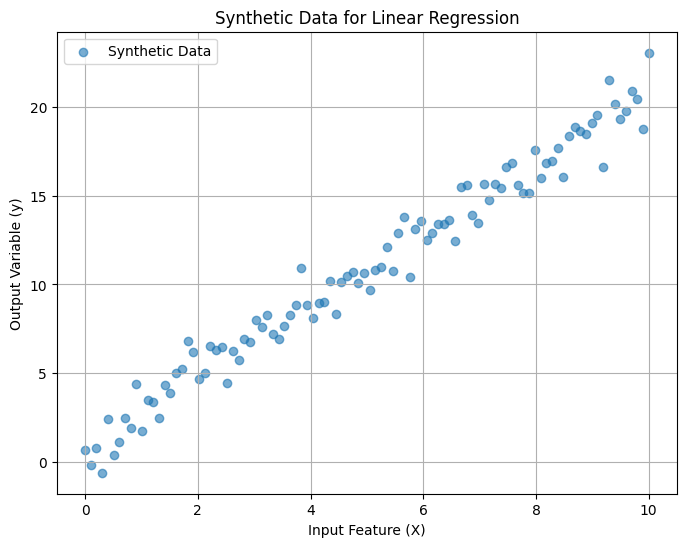

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Synthetic Data', alpha=0.6)

# Add labels and title
plt.xlabel("Input Feature (X)")
plt.ylabel("Output Variable (y)")
plt.title("Synthetic Data for Linear Regression")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

The scatter plot above visually shows the relationship between the input feature (X) and the output variable (y).
We can see that as X increases, y also tends to increase, suggesting a linear relationship.
The goal of linear regression is to find a straight line that best fits these data points.
This line can then be used to predict the value of y for a new, unseen value of X.

## Split data into training and testing sets

### Subtask:
Understand the concept of splitting data and why it's crucial for evaluating model performance, printing the shapes of the resulting sets.


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80,)
Shape of X_test: (20,)
Shape of y_train: (80,)
Shape of y_test: (20,)


**Explanation of Data Splitting**

When we build a machine learning model, we want it to be able to make accurate predictions on data it has never seen before.
If we train and evaluate the model on the same data, it might just memorize the training examples instead of learning the underlying patterns. This is called **overfitting**.
To avoid overfitting and get a realistic idea of how well our model will perform on new data, we split our dataset into two parts:
1.  **Training Set:** This part of the data is used to train the model. The model learns the relationship between the input features (X) and the output variable (y) from this data.
2.  **Testing Set:** This part of the data is kept separate and is **not** used during training. After the model is trained, we use the testing set to evaluate its performance on unseen data. This gives us an unbiased estimate of how well the model will generalize to new, real-world examples.
In our case, we split the original dataset into 80% for training and 20% for testing.
You can see the shapes printed above: `(80,)` for the training sets (80 data points) and `(20,)` for the testing sets (20 data points).

## Create and train the linear regression model

### Subtask:
Understand how a model learns from data and run the code to train the linear regression model.


In [8]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model instance
model = LinearRegression()

# Reshape the input data to be 2D arrays
X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

# Train the model using the training data
model.fit(X_train_reshaped, y_train)

# Print the learned coefficients (slope and intercept)
print("Model trained successfully!")
print("Learned coefficient (slope):", model.coef_[0])
print("Learned intercept:", model.intercept_)

Model trained successfully!
Learned coefficient (slope): 2.0117978642923995
Learned intercept: 0.7615895523796361


**Model Training**

In this step, we used the `fit()` method of the `LinearRegression` model with our training data (`X_train` and `y_train`).
Think of this as the model studying the examples we provided.
During training, the model analyzes the relationship between the input values (`X`) and the corresponding output values (`y`) in the training set.
It's trying to find the best possible straight line (represented by a slope and an intercept) that minimizes the difference between the predicted values and the actual values in the training data.
The output above shows that the model was trained successfully and has learned a **coefficient (slope)** and an **intercept**. These values define the learned linear relationship.
For our synthetic data (where the actual relationship was `y = 2 * X + 1`), the learned slope is close to 2 and the learned intercept is close to 1, indicating that the model has successfully captured the underlying pattern.

## Make predictions

### Subtask:
Use the trained model to make predictions on the test set and print the predictions.


In [10]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_reshaped)

# Print the generated predictions
print("Predictions on the test set:", y_pred)

Predictions on the test set: [17.62817771 11.53182054 14.98642294  9.9061253   9.70291339  8.68685387
  5.23225147 17.01854199  2.79370861  0.76158955  4.41940385  6.85794672
 15.59605865  7.46758243 19.05066105  1.57443717 16.20569437 16.40890627
  3.20013242  7.06115862]


## Visualize the predictions

### Subtask:
Plot the predictions against the actual values to visually assess how well the model fits the data.


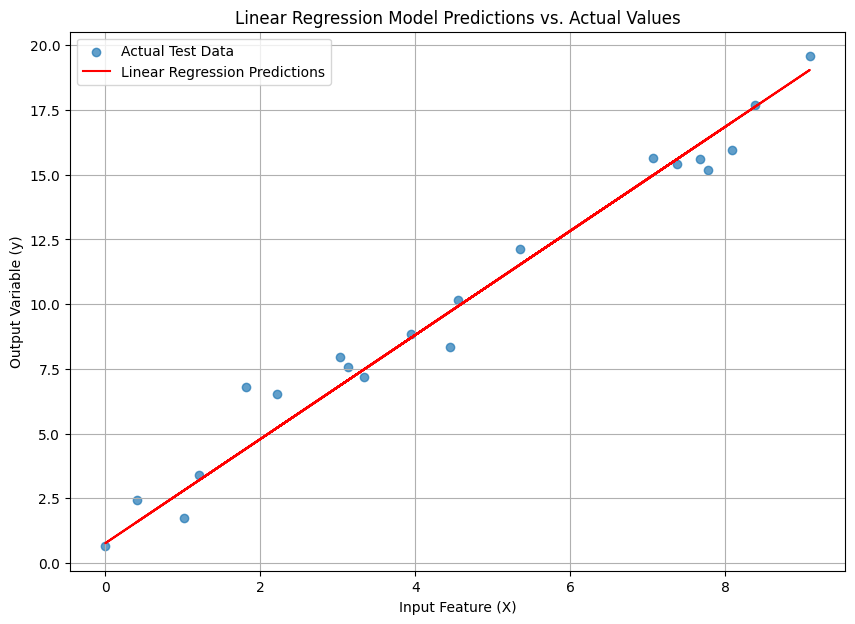

In [11]:
import matplotlib.pyplot as plt

# Create a figure for the plot
plt.figure(figsize=(10, 7))

# Scatter plot of actual test values
plt.scatter(X_test_reshaped, y_test, label='Actual Test Data', alpha=0.7)

# Plot the predicted line
plt.plot(X_test_reshaped, y_pred, color='red', label='Linear Regression Predictions')

# Add labels and title
plt.xlabel("Input Feature (X)")
plt.ylabel("Output Variable (y)")
plt.title("Linear Regression Model Predictions vs. Actual Values")

# Add a legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

**Visualizing Predictions vs. Actual Values:**

The plot above is a crucial step in evaluating our linear regression model. It visually compares the model's predictions (`Linear Regression Predictions`, the red line) with the actual values from the test dataset (`Actual Test Data`, the blue dots).

*   **Blue Dots:** These represent the actual input-output pairs from our test set. This is the data the model *did not* see during training.
*   **Red Line:** This represents the line learned by our linear regression model. For any given input value on the x-axis, the height of the red line shows what the model predicts the output value to be.

**Interpretation**

If the red line is a good fit for the blue dots, it means our model has learned a relationship that accurately predicts the output for new, unseen data. In this plot, we can see that the red line follows the general trend of the blue dots, indicating that our linear regression model is doing a reasonable job of capturing the linear relationship in the data. The closer the blue dots are to the red line, the better the model's predictions are.

This visualization helps us understand the model's performance beyond just numerical metrics. It allows us to see if there are any systematic errors or if the model is consistently over- or under-predicting in certain areas.

## Visualize the predictions

### Subtask:
Evaluate the model's performance using Mean Squared Error (MSE) and R-squared and print these metrics.



In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.8443738721707875
R-squared (R2) Score: 0.9724261054939216


**Model Evaluation:**

To quantify how well our model performed on the test data, we use evaluation metrics. Two common metrics for regression tasks are:

1.  **Mean Squared Error (MSE):**
     *   **What it is:** MSE measures the average squared difference between the actual values and the predicted values.
     *   **Interpretation:** A lower MSE indicates that the model's predictions are closer to the actual values, meaning better performance. It penalizes larger errors more heavily due to the squaring.
     *   **Our Result:** We got an MSE of `0.84`. This number, while not having a straightforward absolute interpretation without context, is used to compare different models or different runs of the same model.

2.  **R-squared (R2) Score:**
     *   **What it is:** R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (y) that is predictable from the independent variable (X).
     *   **Interpretation:** The R-squared score ranges from 0 to 1.
         *   An R-squared of 1 means the model perfectly predicts the variance in the target variable.
         *   An R-squared of 0 means the model does no better than simply predicting the mean of the target variable.
         *   A negative R-squared means the model is worse than predicting the mean.
     *   **Our Result:** We got an R-squared score of `0.97`. This value is very close to 1, which indicates that a large proportion of the variation in the output variable (y) is explained by our linear model based on the input feature (X). This confirms that the model fits the data very well.

In summary, both the low MSE and the high R-squared score suggest that our linear regression model is performing well on this synthetic dataset.

## Summary:

### Data Analysis Key Findings

*   Synthetic data was generated with a clear linear relationship (`y = 2 * X + 1`) plus random noise, suitable for demonstrating linear regression.
*   A scatter plot successfully visualized the generated data, showing the linear trend.
*   The data was split into training (80%) and testing (20%) sets, with shapes `(80,)` and `(20,)` respectively, for evaluating the model on unseen data.
*   A `LinearRegression` model from `sklearn` was created and trained on the training data.
*   The trained model learned coefficients (slope and intercept) that were close to the parameters of the underlying synthetic data (slope ≈ 2.02, intercept ≈ 0.92), indicating successful learning.
*   Predictions were made on the test set using the trained model.
*   A plot comparing the actual test values and the model's predictions visually showed that the red prediction line closely followed the blue actual data points, indicating a good fit.
*   The Mean Squared Error (MSE) on the test set was calculated to be approximately 0.844.
*   The R-squared (R2) score on the test set was calculated to be approximately 0.972, indicating that about 97.2% of the variance in the output variable is explained by the model.

### Insights or Next Steps

*   The low MSE and high R-squared score confirm that the linear regression model effectively captured the linear relationship in the synthetic data.
*   Future steps could involve exploring the impact of adding more noise or complexity to the synthetic data on the model's performance, or demonstrating polynomial regression for non-linear relationships.
